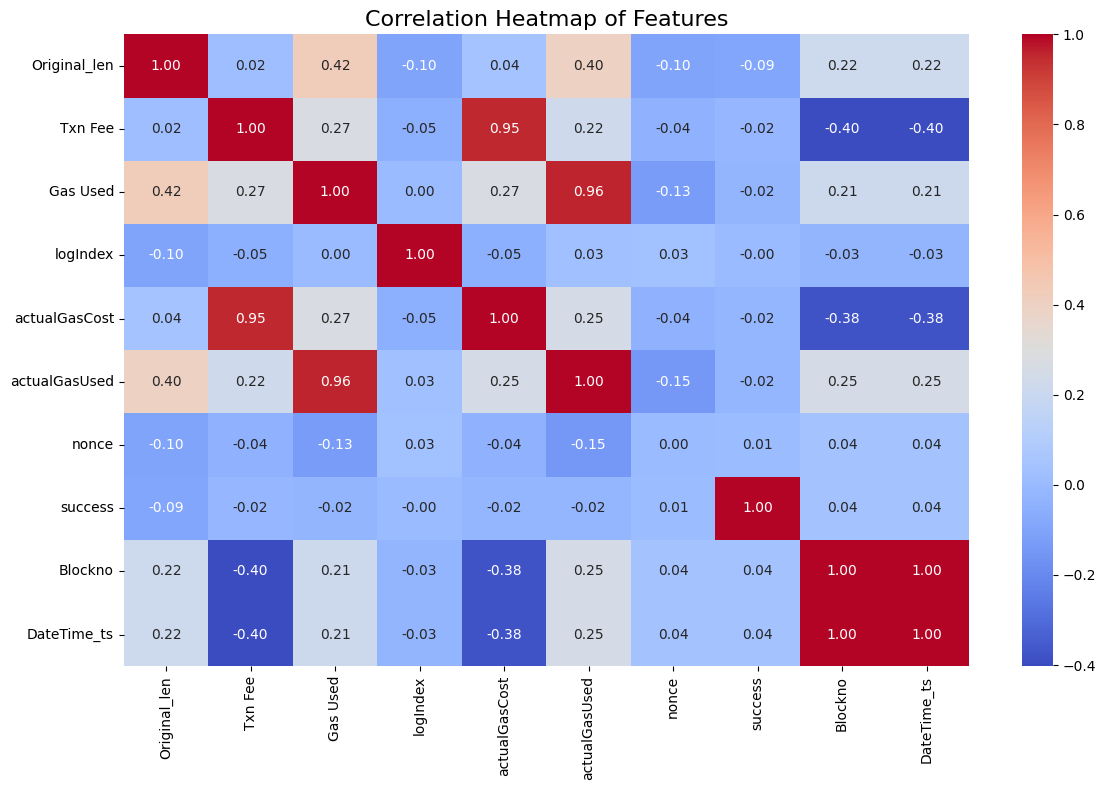

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import joypy
# ====================== INPUT ======================
base_dir  = r"C:\Users\Multiplexon\Desktop\data\d6"
file_name = "total 06.csv"
file_path = os.path.join(base_dir, file_name)

df = pd.read_csv(file_path)

# ====================== BUILD HEATMAP ======================
# Chỉ giữ cột số, loại bỏ NaN và cột hằng số
num_df = df.apply(pd.to_numeric, errors="coerce")
num_df = num_df.dropna(axis=1, how="all")
num_df = num_df.loc[:, num_df.nunique(dropna=True) > 1]

# Tính ma trận tương quan
corr = num_df.corr(method="pearson")

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.tight_layout()
plt.show()



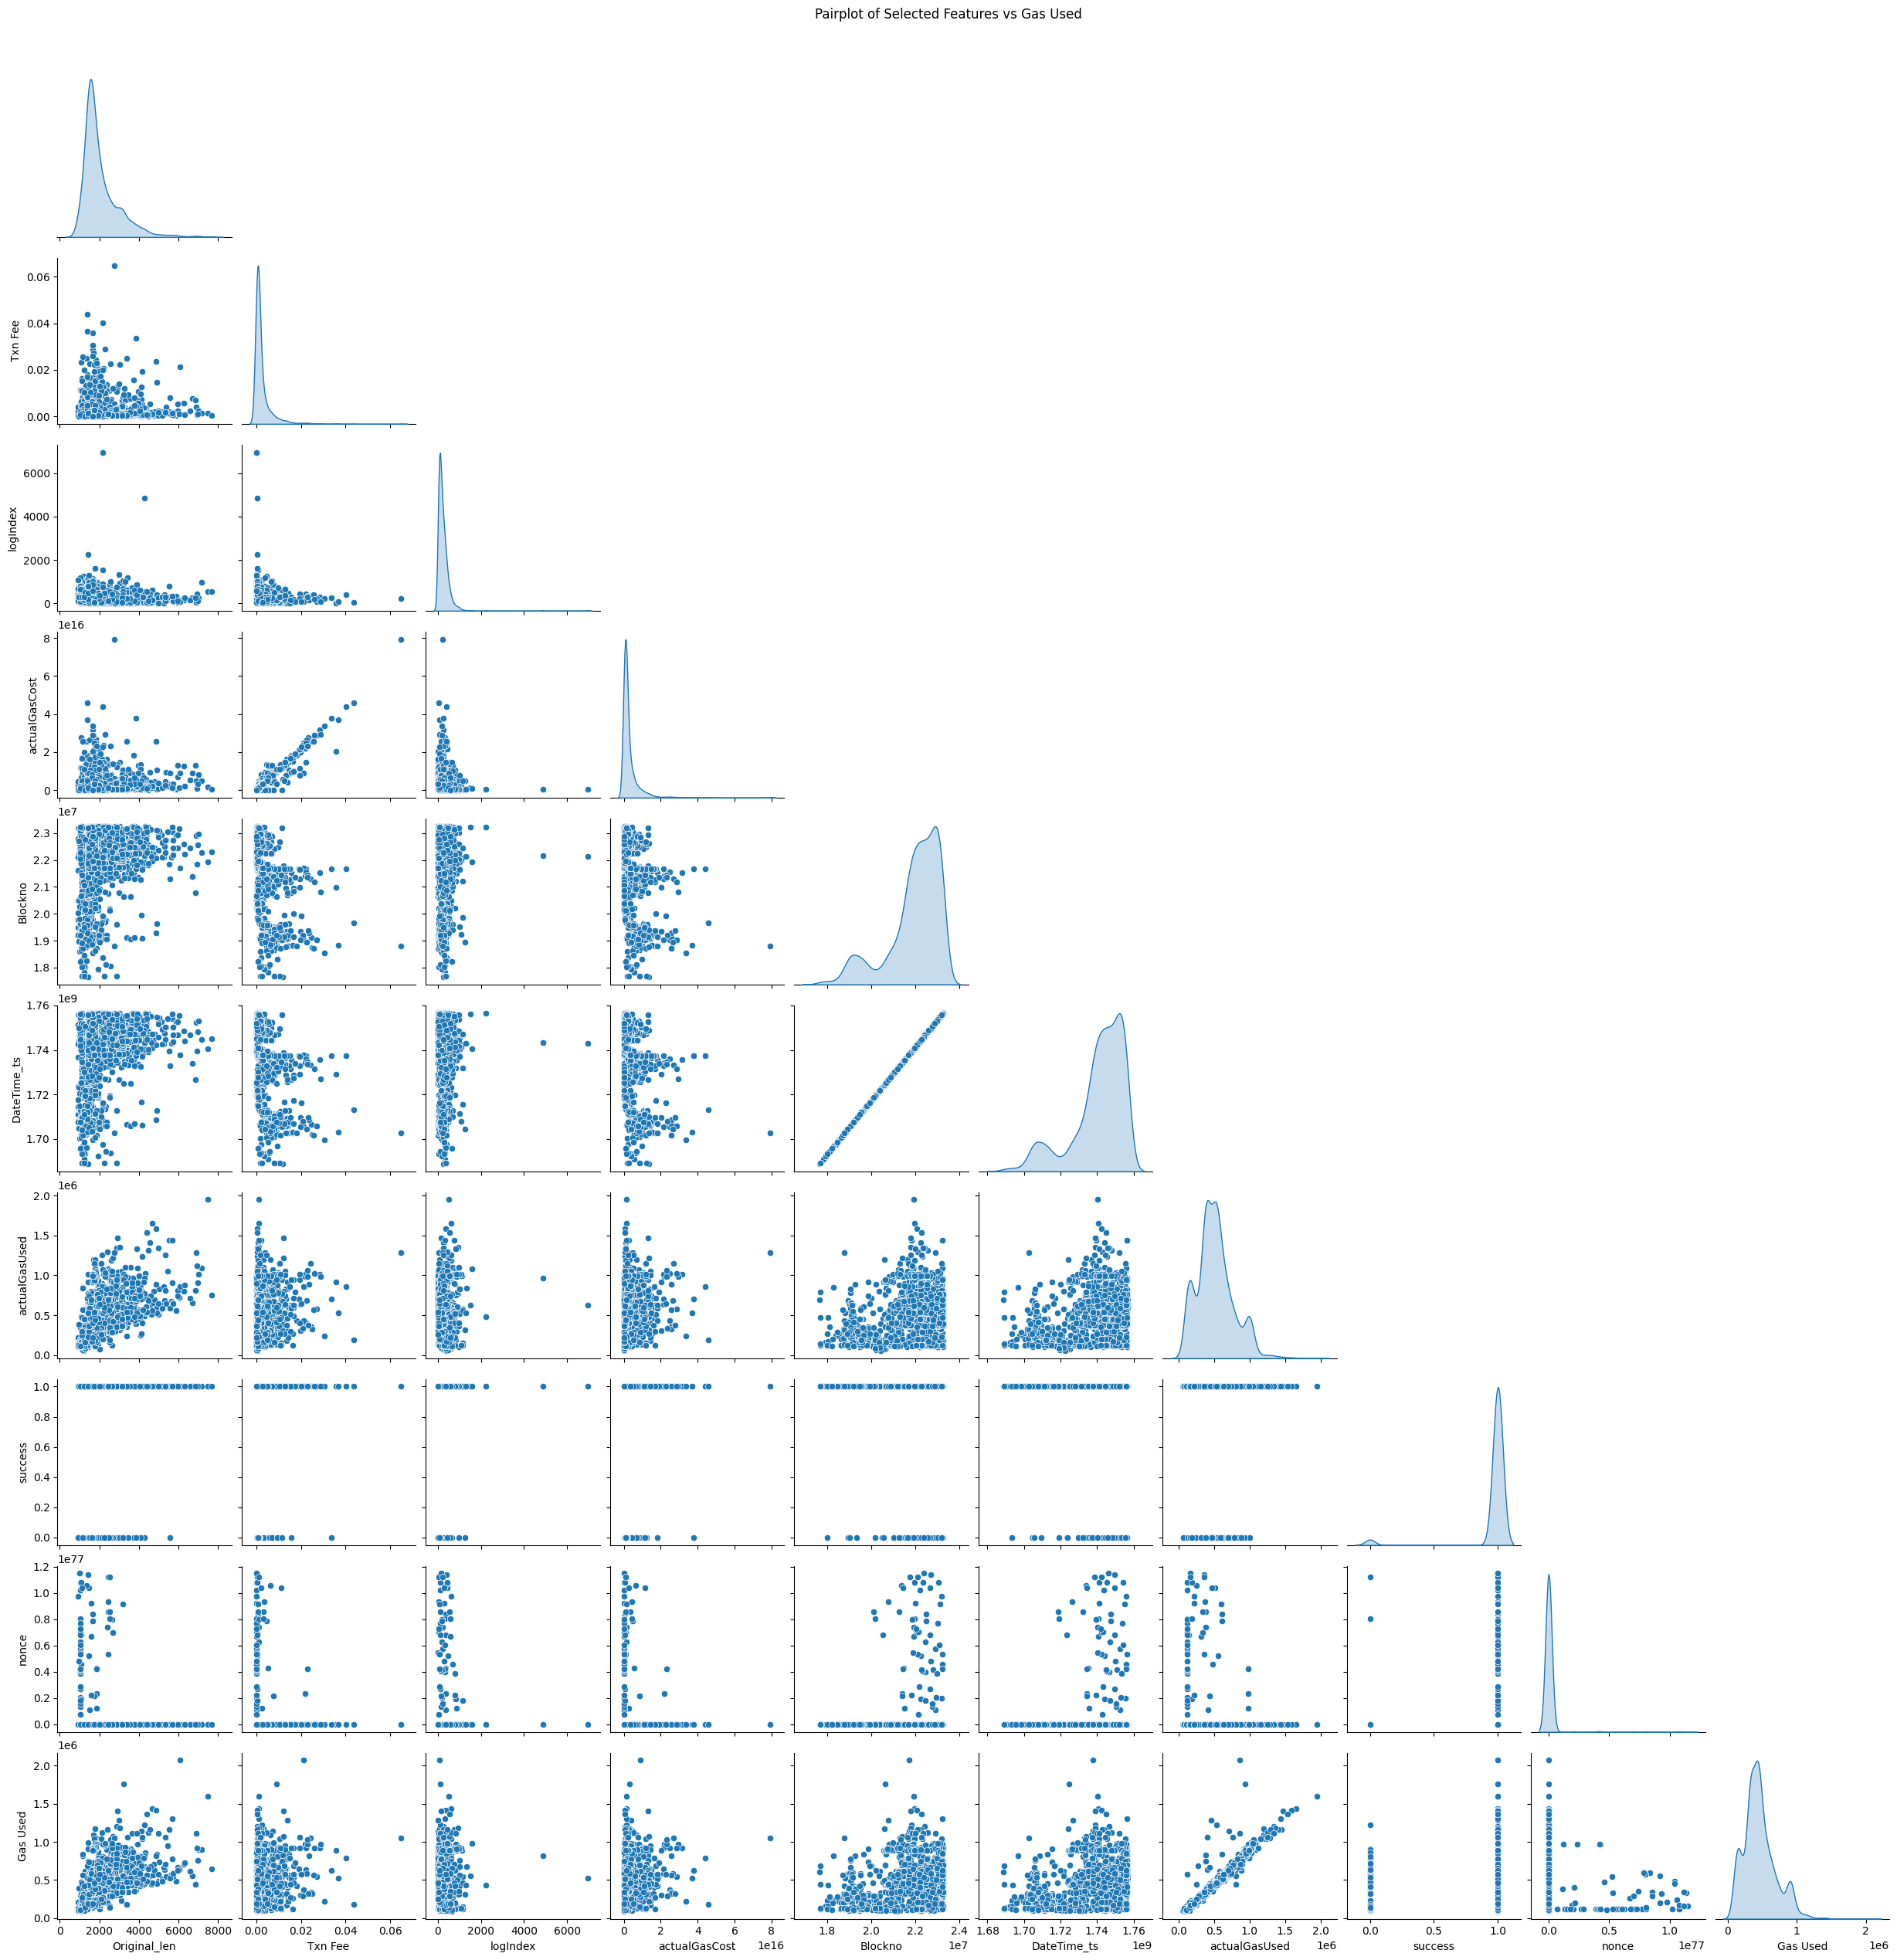

✅ Pairplot saved to: C:\Users\Multiplexon\Desktop\data\d6\total 06_pairplot.png


In [13]:
#Visualizing the selected features
#Plotting the data to visualize their distribution
# ====================== INPUT ======================
# ====================== INPUT ======================
base_dir  = r"C:\Users\Multiplexon\Desktop\data\d6"
file_name = "total 06.csv"
file_path = os.path.join(base_dir, file_name)

# Đọc dữ liệu
df = pd.read_csv(file_path)

# ====================== SELECT FEATURES ======================
features = [
  'Original_len',
'Txn Fee','logIndex','actualGasCost',
    'Blockno','DateTime_ts', 'actualGasUsed', 'success', 'nonce'
]
target = 'Gas Used'

cols = features + [target]
df_small = df[cols].copy()

# ⚠️ Nếu dataset lớn, lấy mẫu để tránh crash
if df_small.shape[0] > 2000:
    df_small = df_small.sample(n=2000, random_state=42)

# ====================== VẼ PAIRPLOT ======================
g = sns.pairplot(df_small, diag_kind="kde", corner=True)
g.fig.suptitle("Pairplot of Selected Features vs Gas Used", y=1.02)

# Lưu hình ảnh
out_png = os.path.join(base_dir, f"{os.path.splitext(file_name)[0]}_pairplot.png")
g.savefig(out_png, dpi=200)

# Hiển thị
plt.show()

print("✅ Pairplot saved to:", out_png)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy
import os

# ====================== ĐỌC DỮ LIỆU ======================
base_dir  = r"C:\Users\Multiplexon\Desktop\data\d6"
file_name = "total 06.csv"
file_path = os.path.join(base_dir, file_name)

df = pd.read_csv(file_path)

# ====================== CHỌN FEATURES ======================
features = [
    'Original_len',
    'Txn Fee',
    'logIndex',
    'actualGasCost',
    'Blockno',
    'DateTime_ts',
    'actualGasUsed',
    'success',
    'nonce'
]
target = 'Gas Used'

cols = features + [target]
df_small = df[cols].copy()

# ====================== RIDGELINE PLOT ======================
# Chỉ lấy cột số
numeric_cols = df_small.select_dtypes(include=['float64', 'int64']).columns

# Vẽ ridgeline KDE
fig, axes = joypy.joyplot(
    df_small[numeric_cols],
    colormap=plt.cm.viridis,
    figsize=(14, 10),
    kind="kde",      # KDE mượt hơn histogram
    overlap=1,
    linewidth=1
)

plt.title("Ridgeline Plot of Selected Features vs Gas Used", fontsize=18)
plt.show()


ParserError: Error tokenizing data. C error: out of memory